In [1]:
%matplotlib inline

import numpy as np
import pylab as plt

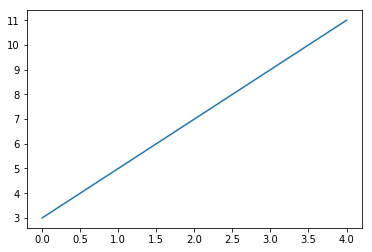

In [13]:
x = np.linspace(0,4,10)
y_truth = 2*x+3

plt.plot(x,y_truth)

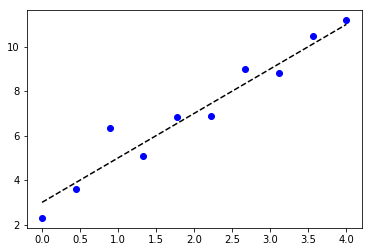

In [21]:
y_obs = y_truth+np.random.normal(0,1,len(y_truth))

plt.plot(x,y_truth,'k--')
plt.plot(x,y_obs,'bo')

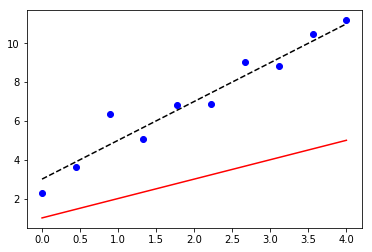

In [22]:
def model(x,a,b):
    return a*x+b

y_theory = model(x,1,1)

plt.plot(x,y_truth,'k--')
plt.plot(x,y_obs,'bo')
plt.plot(x,y_theory,'r-')

187.11128350861068
116.1380505669802


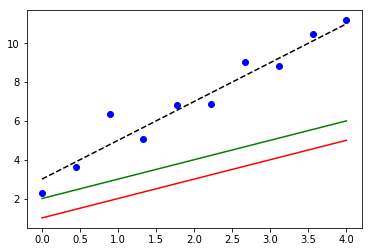

In [32]:
y_theory1 = model(x,1,1)
y_theory2 = model(x,1,2)

plt.plot(x,y_truth,'k--')
plt.plot(x,y_obs,'bo')
plt.plot(x,y_theory1,'r-')
plt.plot(x,y_theory2,'g-')

print(np.sum((y_theory1-y_obs)**2))
print(np.sum((y_theory2-y_obs)**2))

In [42]:
a = 1
b = 3
loss0 = np.sum((y_theory-y_obs)**2)

da = 0.02
db = 0.1

for i in range(2000):
    y_theory = model(x,a+da,b)
    loss = np.sum((y_theory-y_obs)**2)
    if loss<loss0:
        loss0 = loss
        a = a+da
    else:
        y_theory = model(x,a-da,b)
        loss = np.sum((y_theory-y_obs)**2)
        loss0 = loss
        a = a-da
    
print(a)

2.040000000000001
